In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [19]:
df = pd.read_csv('data/preprocessed_0815.csv')
df.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,row_id,size_max,size_sum,order_count_max,target
0,0.004499,302.0,152.841727,0.510418,-1.181185,-0.853924,3.512603,-0.803095,500.0,78.264901,-0.246879,228.0,74.579470,-0.669089,-0.426180,0-5,499.0,3179.0,12.0,0.004136
1,0.001204,200.0,147.965217,-0.362378,-1.001272,0.091449,0.511806,0.288387,402.0,149.965000,1.345276,400.0,71.145000,1.269870,-0.172575,0-11,280.0,1289.0,6.0,0.001445
2,0.002369,188.0,159.897059,0.506732,-1.216982,-0.960020,-0.131697,-0.164424,304.0,96.132979,1.279381,449.0,131.037234,0.538682,-1.122790,0-16,391.0,2161.0,8.0,0.002168
3,0.002574,120.0,120.509434,-0.032548,-1.013334,0.692342,-0.116943,0.448781,370.0,114.458333,0.480632,400.0,120.800000,1.293843,0.790816,0-31,450.0,1962.0,15.0,0.002195
4,0.001894,176.0,131.988764,-0.402382,-1.151718,0.377272,-1.027612,0.579404,402.0,119.823864,0.121758,333.0,88.477273,-0.434153,1.519461,0-62,341.0,1791.0,17.0,0.001747


### Difference 1 : df.target - df.realized_volatility
### Difference 2 : np.log1p(df.target / df.realized_volatility)
### Difference 3 : df.target / df.realized_volatility

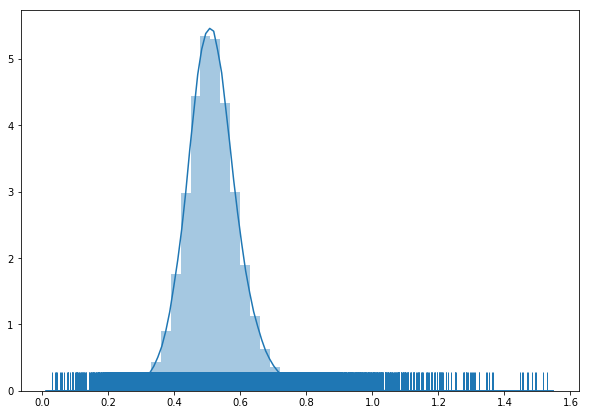

In [24]:
# 2. np.log1p(df.target / df.realized_volatility)

plt.figure(figsize = (10, 7))
sns.distplot(np.log1p(np.log1p(df.target / df.realized_volatility)), kde = True, rug = True)
plt.show()

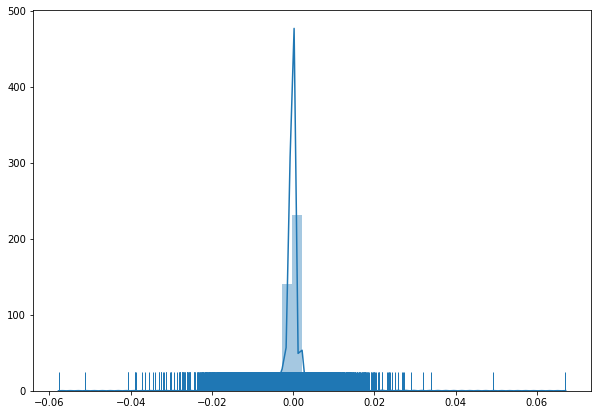

In [25]:
# 1. df.target - df.realized_volatility

plt.figure(figsize = (10, 7))
sns.distplot((df.target - df.realized_volatility), kde = True, rug = True)
plt.show()

In [20]:
target_outliers = df[df.target>=0.01].index
df.drop(target_outliers, axis=0, inplace=True)
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410590 entries, 0 to 410589
Data columns (total 20 columns):
realized_volatility    410590 non-null float64
seconds_count          410590 non-null float64
seconds_right_skew     410590 non-null float64
seconds_skewness       410590 non-null float64
seconds_kurtosis       410590 non-null float64
wap_skewness           410590 non-null float64
wap_kurtosis           410590 non-null float64
bid_size1_skewness     410590 non-null float64
bid_size1_max          410590 non-null float64
bid_size1_mean         410590 non-null float64
ask_size1_skewness     410590 non-null float64
ask_size1_max          410590 non-null float64
ask_size1_mean         410590 non-null float64
bid_size2_skewness     410590 non-null float64
ask_size2_skewness     410590 non-null float64
row_id                 410590 non-null object
size_max               410590 non-null float64
size_sum               410590 non-null float64
order_count_max        410590 non-null float

In [21]:
# seconds_count 4
# bid_size1_mean 4
# realized_volatility 2
# bid_size1_skewness 2
# ask_size1_mean 2
# size_max 2
# ask_size1_skewness 2
# seconds_kurtosis
# seconds_right_skew

small_df = df[['bid_size1_mean','seconds_count','row_id','target']]

# realized_vol 쓸때면
# small_df.columns = ['realized_vol', 'row_id', 'target']

small_df.head()

,bid_size1_mean,seconds_count,row_id,target
0,78.264901,302.0,0-5,0.004136
1,149.965000,200.0,0-11,0.001445
2,96.132979,188.0,0-16,0.002168
3,114.458333,120.0,0-31,0.002195
4,119.823864,176.0,0-62,0.001747


In [22]:
rev = df['realized_volatility']
label = df['target']
small_df['target'] = np.log1p(label / rev)
small_df['original_target'] = label
small_df['realized_volatility'] = rev
small_df.head()

C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,bid_size1_mean,seconds_count,row_id,target,original_target,realized_volatility
0,78.264901,302.0,0-5,0.651902,0.004136,0.004499
1,149.965000,200.0,0-11,0.788197,0.001445,0.001204
2,96.132979,188.0,0-16,0.649919,0.002168,0.002369
3,114.458333,120.0,0-31,0.616779,0.002195,0.002574
4,119.823864,176.0,0-62,0.653535,0.001747,0.001894


In [23]:
# 1. If scaling is needed, run this cell.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X, y, idx = small_df.drop(['row_id','target','realized_volatility','original_target'], axis=1), small_df['target'], small_df[['row_id','original_target','realized_volatility']]

stdsc = StandardScaler()
X_scaled_arr = stdsc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_arr, columns = X.columns)
X_scaled.head()

,bid_size1_mean,seconds_count
0,-0.143876,-0.648630
1,-0.129421,-1.397274
2,-0.140274,-1.485350
3,-0.136579,-1.984446
4,-0.135497,-1.573426


In [15]:
# 2. if scaling is not needed, run this cell.

from sklearn.preprocessing import PolynomialFeatures

X_scaled, y, idx = small_df.drop(['row_id','target','realized_volatility','original_target'], axis=1), small_df['target'], small_df[['row_id','original_target','realized_volatility']]

In [24]:
poly = PolynomialFeatures(degree=3)
X_poly_arr = poly.fit_transform(X_scaled)
X_poly = pd.DataFrame(X_poly_arr)
X_poly.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,-0.143876,-0.648630,0.020700,0.093322,0.420721,-0.002978,-0.013427,-0.060532,-0.272892
1,1.0,-0.129421,-1.397274,0.016750,0.180837,1.952376,-0.002168,-0.023404,-0.252678,-2.728004
2,1.0,-0.140274,-1.485350,0.019677,0.208355,2.206265,-0.002760,-0.029227,-0.309481,-3.277076
3,1.0,-0.136579,-1.984446,0.018654,0.271034,3.938027,-0.002548,-0.037018,-0.537852,-7.814804
4,1.0,-0.135497,-1.573426,0.018360,0.213195,2.475669,-0.002488,-0.028887,-0.335447,-3.895282


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [26]:
X_train, X_test, y_train, y_test, _, original_test = train_test_split(X_poly, y, idx, test_size = 0.2)

In [27]:
original_test.head()

,row_id,original_target,realized_volatility
407990,126-8590,0.005769,0.004163
113337,34-10135,0.002786,0.003399
173345,52-15209,0.003408,0.003556
62529,18-8825,0.005494,0.005153
351684,109-1876,0.006010,0.007197


In [28]:
best_xgbr = XGBRegressor(objective = 'reg:squarederror',
                    learning_rate = 0.1,
                    n_estimators = 100,
                    max_depth = 7,
                    min_child_weight = 5,
                    colsample_bytree = 0.7,
                    subsample = 0.9,
                    gamma = 0,
                    reg_alpha = 0.01)

best_xgbr.fit(X_train, y_train)
y_pred = best_xgbr.predict(X_test)
print('xgb RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('xgb R2 :', r2_score(y_test, y_pred))
y_test_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
y_test_df['rmspe_before'] = ((y_test_df.y_test-y_test_df.y_pred)/y_test_df.y_test)**2
print('xgb RMSPE :',np.sqrt(y_test_df.rmspe_before.sum()/len(y_test_df)))

C:\Users\frank\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


xgb RMSE : 0.13483931464393778
xgb R2 : 0.0070402512120469884
xgb RMSPE : 0.24625672519900396


In [29]:
original_y_pred = np.expm1(y_pred) * original_test['realized_volatility']
original_y_test = original_test['original_target']

# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('R2 :', r2_score(y_test, y_pred))
y_test_df = pd.DataFrame({'y_test':original_y_test, 'y_pred':original_y_pred})
y_test_df['rmspe_before'] = ((y_test_df.y_test-y_test_df.y_pred)/y_test_df.y_test)**2
print('RMSPE :',np.sqrt(y_test_df.rmspe_before.sum()/len(y_test_df)))

RMSPE : 0.3732402053412498


In [81]:
y_test_df

,y_test,y_pred,rmspe_before
14102,0.004632,0.005515,0.036271
195080,0.004349,0.004023,0.005598
228649,0.001628,0.001485,0.007714
16015,0.018221,0.020247,0.012369
302,0.001987,0.001827,0.006495
261062,0.003268,0.003569,0.008496
382185,0.006980,0.004466,0.129697
230021,0.005466,0.007425,0.128550
90567,0.003363,0.003648,0.007173
211679,0.017452,0.022230,0.074928
